In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 머신 러닝 (50점)
데이터 : 고객 정보, 소비 제품, 구매 채널 관련 데이터

In [1]:
# #  예제 데이터 설명 

# # 고객 정보 데이터 
# * ID: 고객의 고유 식별자
# * Year_Birth: 고객의 출생 연도
# * Marital_Status: 고객의 결혼 여부
# * Income: 고객의 연간 가계 소득
# * Kidhome: 고객 가구의 어린이 수
# * Teenhome: 고객 가구의 청소년 수

# # Products 
# * MntWines: 지난 2년 동안 와인에 소비한 금액
# * MntFruits: 지난 2년 동안 과일에 소비한 금액
# * MntMeatProducts: 지난 2년 동안 육류에 소비된 금액
# * MntFishProducts: 지난 2년 동안 생선에 소비한 금액
# * MntSweetProducts: 지난 2년간 사탕에 소비한 금액

# # Place 
# * NumWebPurchases: 회사 웹사이트를 통해 이루어진 구매 수
# * NumCatalogPurchases: 카탈로그를 사용하여 이루어진 구매 수
# * NumStorePurchases: 매장에서 직접 구매한 횟수
# * NumWebVisitsMonth: 지난 달 회사 웹 사이트 방문 횟수

import pandas as pd 
raw_df = pd.read_csv("./../data/26_problem1.csv")
raw_df.head()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Single,58138.0,0,0,635,88,546,172,88,3,8,10,4,7
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5


In [2]:
# 1. 데이터 전처리 및 군집생성

In [3]:
# 1-1. 결측치를 확인하고, 결측치 제거하세요. (EDA)

In [4]:
df = raw_df.copy()

In [5]:
'''
약 1%의 결측치가 Income에 존재
    -> KNNImputer를 사용하여 결측치를 대체하기로 한다.
'''

df.isna().sum() / len(df)*100

ID                     0.000000
Year_Birth             0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
dtype: float64

In [6]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

feature_columns = df.drop(columns=["ID", 'Marital_Status']).columns
df[feature_columns] = imputer.fit_transform(df[feature_columns])

In [7]:
df.isna().sum() / len(df)*100

ID                     0.0
Year_Birth             0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
dtype: float64

In [8]:
# 1-2. 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타내세요. 
import matplotlib.pyplot as plt
import seaborn as sns

14


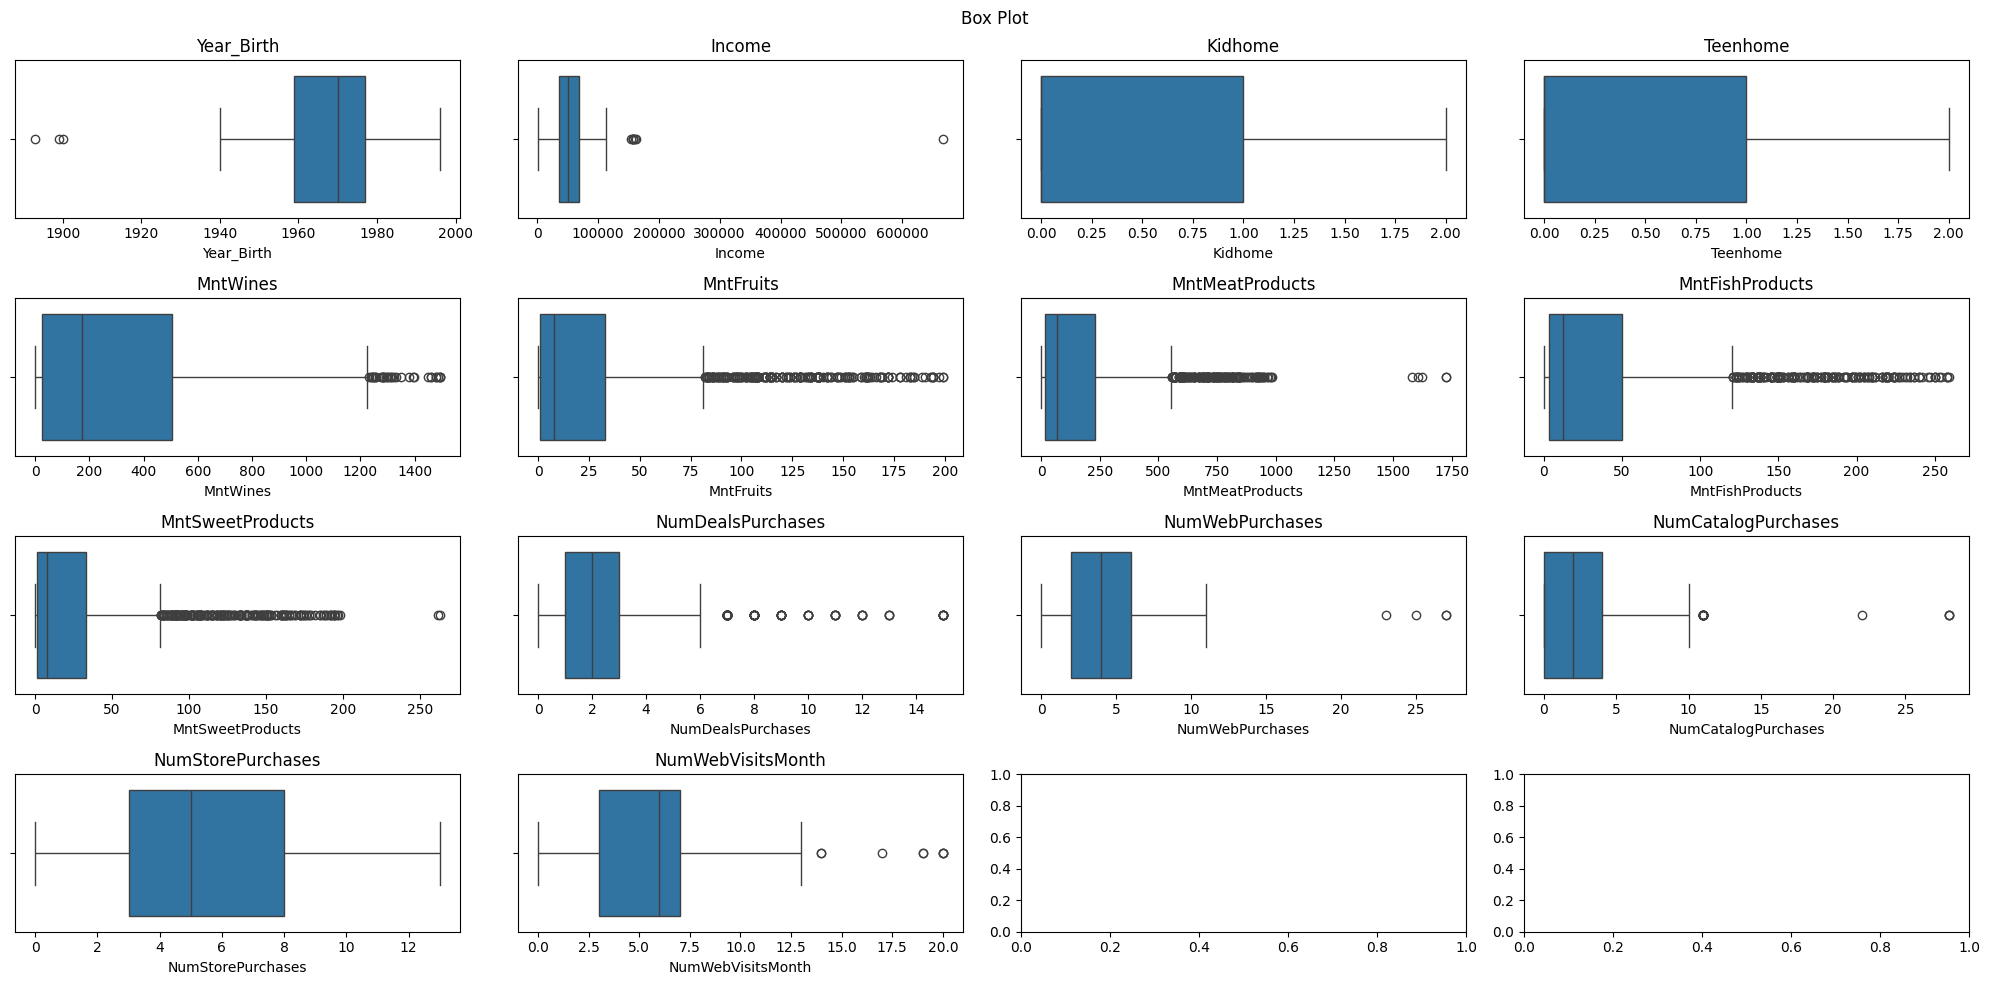

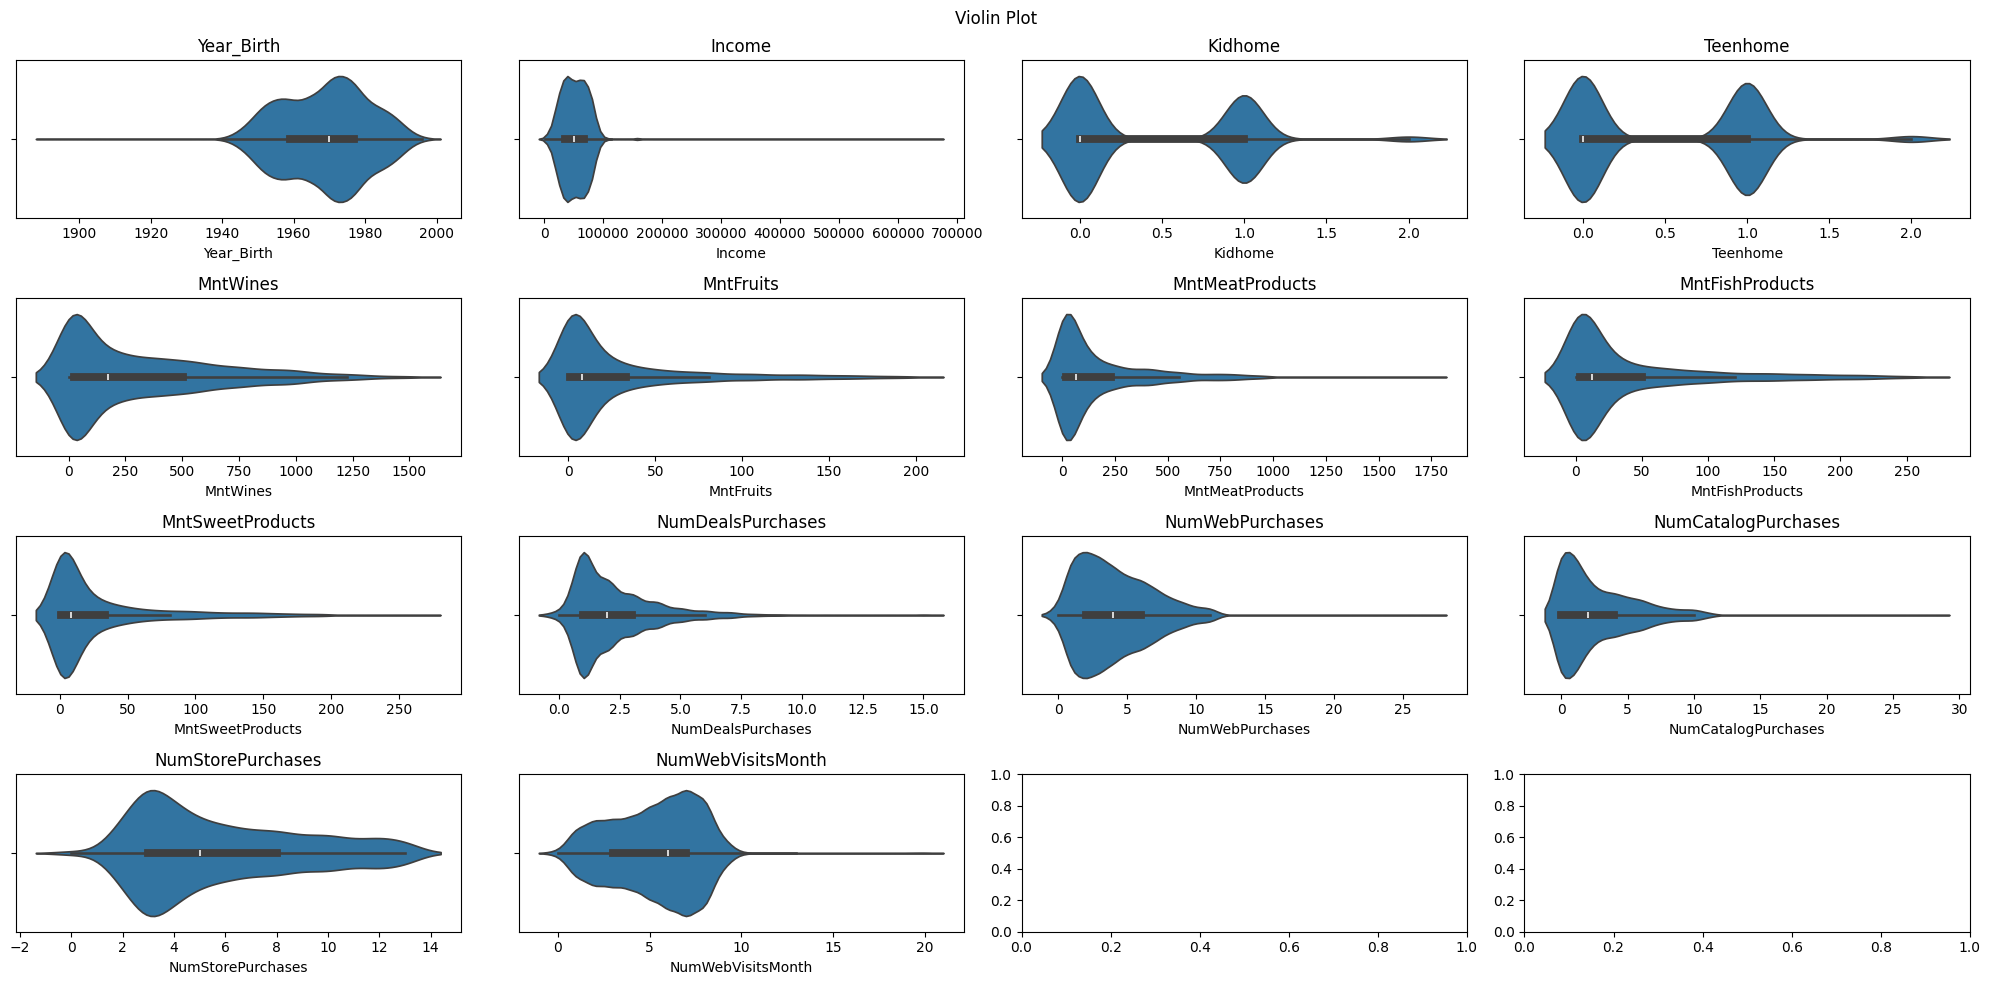

In [9]:
'''
numerical feature에 대한 이상치 확인
    Year_Birth와 Income에 이상치가 존재
    -> 완전히 이상치로 판단되는 데이터는 제거하기로 한다.
'''
feature_columns = df.drop(columns=["ID", 'Marital_Status']).columns
print(len(feature_columns))

fig, axes = plt.subplots(4, 4, figsize=(20, 10))

for idx, feature in enumerate(feature_columns):
    sns.boxplot(x=df[feature], ax=axes[idx//4, idx%4])
    axes[idx//4, idx%4].set_title(feature)
plt.suptitle("Box Plot")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 4, figsize=(20, 10))

for idx, feature in enumerate(feature_columns):
    sns.violinplot(x=df[feature], ax=axes[idx//4, idx%4])
    axes[idx//4, idx%4].set_title(feature)
plt.suptitle("Violin Plot")
plt.tight_layout()
plt.show()


In [10]:
'''
object type feature에 대한 이상치 확인
    Alone, Absurd, YOLO라는 이상치가 존재
    -> 이상치로 판단되는 데이터는 제거하기로 한다.
'''
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [11]:
outliers = (df['Year_Birth'] < 1910) | (300000 < df['Income']) | df['Marital_Status'].isin(['Alone', 'Absurd', 'YOLO'])

In [12]:
df = df[~outliers]

In [13]:
# 1-3. 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성하세요. 

In [14]:
df = pd.concat([
    df.drop(columns=['Marital_Status']),
    pd.get_dummies(df['Marital_Status'])
], axis=1)

In [15]:
df = df.set_index('ID')

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

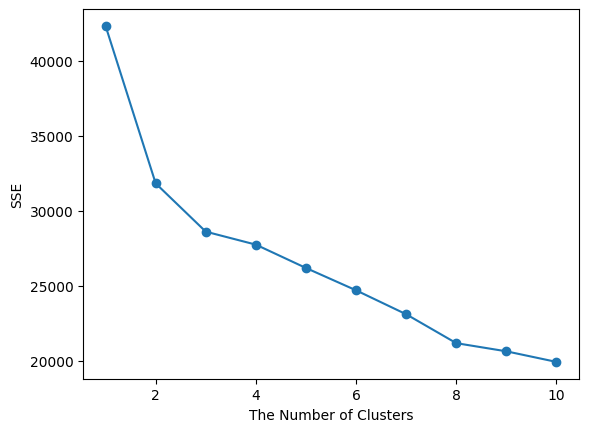

[42350.99999999999, 31832.28196965518, 28609.41833792527, 27741.456355552225, 26181.986707185766, 24690.450324111953, 23091.641305026198, 21160.892623576063, 20616.058477175735, 19907.903045934123]


In [17]:
# KMeans
from sklearn.cluster import KMeans

def elbow(X):
    sse=[]
    for i in range(1, 11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)

elbow(X)

In [18]:
# K-Means 군집화 실행
km = KMeans(n_clusters = 8, random_state=1)
km.fit(X)

KMeans(random_state=1)

In [19]:
# 할당된 군집을 credit 데이터에 추가
new_labels = km.labels_
df['cluster'] = new_labels
df

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Divorced,Married,Single,Together,Widow,cluster
ID,,,,,,,,,,,,,,,,,,,,
5524,1957.0,58138.0,0.0,0.0,635.0,88.0,546.0,172.0,88.0,3.0,8.0,10.0,4.0,7.0,False,False,True,False,False,3
2174,1954.0,46344.0,1.0,1.0,11.0,1.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,5.0,False,False,True,False,False,7
4141,1965.0,71613.0,0.0,0.0,426.0,49.0,127.0,111.0,21.0,1.0,8.0,2.0,10.0,4.0,False,False,False,True,False,1
6182,1984.0,26646.0,1.0,0.0,11.0,4.0,20.0,10.0,3.0,2.0,2.0,0.0,4.0,6.0,False,False,False,True,False,0
5324,1981.0,58293.0,1.0,0.0,173.0,43.0,118.0,46.0,27.0,5.0,5.0,3.0,6.0,5.0,False,True,False,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967.0,61223.0,0.0,1.0,709.0,43.0,182.0,42.0,118.0,2.0,9.0,3.0,4.0,5.0,False,True,False,False,False,5
4001,1946.0,64014.0,2.0,1.0,406.0,0.0,30.0,0.0,0.0,7.0,8.0,2.0,5.0,7.0,False,False,False,True,False,0
7270,1981.0,56981.0,0.0,0.0,908.0,48.0,217.0,32.0,12.0,1.0,2.0,3.0,13.0,6.0,True,False,False,False,False,6


In [20]:
# 2. 군집분석

In [21]:
# 2-1. 위에서 생성한 군집들의 특성을 분석하세요. 

<Axes: xlabel='cluster'>

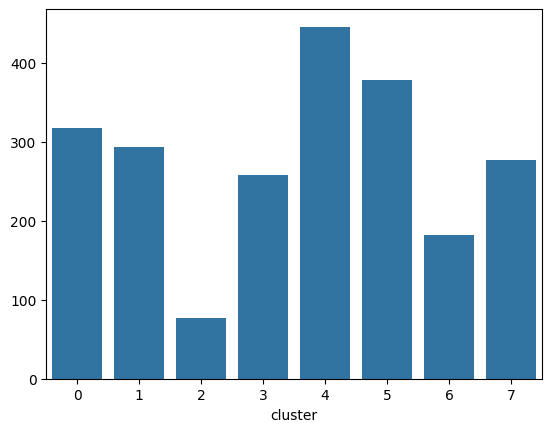

In [22]:
# 군집별 사이즈 확인
cluster_vc = df['cluster'].value_counts()
sns.barplot(x=cluster_vc.index, y=cluster_vc.values)

In [23]:
# 고객 정보 데이터 확인
customer_info_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome']

df.groupby('cluster')[customer_info_cols].mean()

,Year_Birth,Income,Kidhome,Teenhome
cluster,,,,
0,1969.371069,37666.997484,0.726415,0.537736
1,1968.054608,77769.772014,0.030717,0.054608
2,1958.558442,56704.719481,0.233766,0.636364
3,1970.399225,74920.623256,0.062016,0.271318
4,1972.488789,35715.624215,0.762332,0.443946
5,1963.777778,60937.523280,0.201058,1.015873
6,1966.681319,46598.912088,0.516484,0.675824
7,1973.267148,35706.172563,0.743682,0.425993


In [24]:
# products 데이터 확인
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']

df.groupby('cluster')[product_cols].mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
cluster,,,,,
0,68.509434,6.069182,33.245283,10.305031,6.128931
1,666.088737,39.921502,493.665529,74.477816,41.245734
2,369.272727,33.090909,189.285714,51.389610,39.012987
3,528.965116,100.604651,413.562016,125.930233,104.790698
4,56.029148,6.246637,28.535874,9.275785,6.331839
5,545.859788,23.441799,156.206349,31.018519,25.119048
6,247.692308,14.538462,80.335165,18.401099,11.340659
7,71.693141,7.732852,34.971119,9.862816,7.245487


In [25]:
# place 데이터 확인
place_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

df.groupby('cluster')[place_cols].mean()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
cluster,,,,
0,2.628931,0.732704,3.594340,6.383648
1,4.634812,6.283276,8.296928,2.587031
2,4.623377,3.324675,6.415584,4.883117
3,5.879845,5.503876,8.480620,3.050388
4,2.414798,0.654709,3.500000,6.448430
5,6.661376,3.518519,8.452381,5.563492
6,3.945055,1.835165,5.076923,6.120879
7,2.613718,0.830325,3.559567,6.537906


In [26]:
# 2-2. 각 군집 별 상품을 추천하세요.
product_df = df.groupby('cluster')[product_cols].mean()

product_df.rank(axis=1, ascending=False)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
cluster,,,,,
0,1.0,5.0,2.0,3.0,4.0
1,1.0,5.0,2.0,3.0,4.0
2,1.0,5.0,2.0,3.0,4.0
3,1.0,5.0,2.0,3.0,4.0
4,1.0,5.0,2.0,3.0,4.0
5,1.0,5.0,2.0,3.0,4.0
6,1.0,4.0,2.0,3.0,5.0
7,1.0,4.0,2.0,3.0,5.0


In [27]:
product_scaled_df = product_df.div(product_df.sum(axis=0),axis=1)

In [34]:
cluster_reco_dict = product_scaled_df.idxmax(axis=1).to_dict()
cluster_reco_dict

{0: 'MntFishProducts',
 1: 'MntMeatProducts',
 2: 'MntSweetProducts',
 3: 'MntSweetProducts',
 4: 'MntFishProducts',
 5: 'MntWines',
 6: 'MntWines',
 7: 'MntFruits'}

In [29]:
# 2-3. ID가 10870인 고객을 대상으로 상품을 추천하세요.

In [35]:
cluster_reco_dict[df.loc[10870,'cluster']]

'MntWines'

##  2. 통계분석 (50점) 

In [ ]:
# 1. 한 공장에서 생산된 제품에서 최근 추정 불량률은 90% 였다. 
# 오차의 한계가 5% 이하가 되도록하는 최소 표본 사이즈를 구하여라.

In [2]:
import numpy as np
from scipy import stats
p = 0.9
e = 0.05
z = stats.norm.ppf(0.975)
n = (z**2 * p * (1 - p)) / e**2

np.ceil(n)

139.0

In [6]:
# 2. 다음은 1월부터 9월까지의 은의 가격이다
import pandas as pd 

data = pd.read_csv("./../data/26_problem4.csv")
data

,1M,2M,3M,4M,5M,6M,7M,8M,9M
0,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


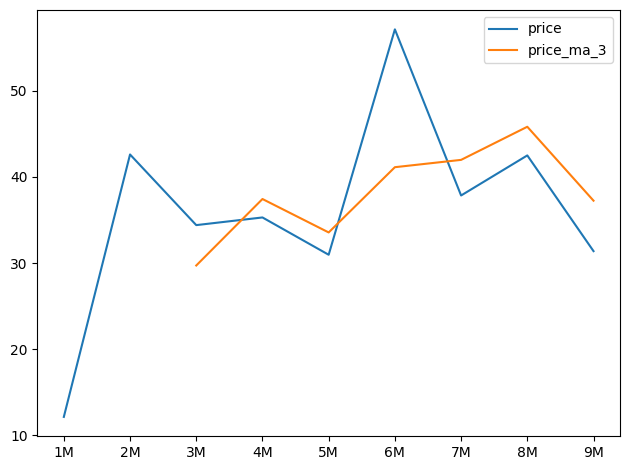

In [7]:
# 2-1.  은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그리세요.
df = data.T.copy()
df.columns = ['price']
df['ma_3'] = df['price'].rolling(window=3).mean()
plt.plot(df.index, df['price'], label='price')
plt.plot(df.index, df['ma_3'], label='price_ma_3')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 2-2.  1월 대비 9월의 은의 가격은 몇 % 올랐는가? (소수점 두번째 자리에서 반올림)

In [15]:
start_price = data['1M'].iloc[0]
end_price = data['9M'].iloc[0]

price_diff = end_price - start_price
price_diff_rate = (price_diff / start_price) * 100
print(
    f"1월 대비 9월의 은의 가격은 {price_diff_rate}% 올랐습니다."
)

1월 대비 9월의 은의 가격은 158.48434925864908% 올랐습니다.


In [17]:
# 3. 아래 그래프는 A,B,C 자치구별 H 의원에 대한 찬성, 반대 투표 결과이다.자치구별 지지율이 같은지에 대해서 검정하라.
raw_df = pd.DataFrame(
    [[176, 193, 159],
     [124, 107, 141]],
    columns=['A', 'B', 'C'],
    index=['찬성', '반대']
)
raw_df

,A,B,C
찬성,176,193,159
반대,124,107,141


In [20]:
from scipy import stats

statistic, p_value, dof, ev_table = stats.chi2_contingency(raw_df)

print(f'statistic   : {statistic}')
print(f'p_value     : {p_value}')

if p_value < 0.05:
    print('지지율이 자치구별로 같지 않다.')
else:
    print('지지율이 자치구별로 같다.')

statistic   : 7.945381231671554
p_value     : 0.01882272023214683
지지율이 자치구별로 같지 않다.


In [23]:
# 4. A학교 남녀 학생들의 평균 혈압 차이가 있는지 여부에 대한 검정하시오.
# 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다
import pandas as pd 
data = pd.read_csv("./../data/26_problem6.csv")
data.head()

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


In [24]:
# 4-1. 남녀 학생들의 평균 혈압 차이가 있는지에 대해 가설을 설정하시오.
H0 = '남녀 학생들의 평균 혈압 차이가 없다.'
H1 = '남녀 학생들의 평균 혈압 차이가 있다.'

In [33]:
# 4-2. 검정통계량을 구하고 판단하시오.
from scipy import stats
male_data = data[data['gender'] == 'male']['pressure']
female_data = data[data['gender'] == 'female']['pressure']

statistic, p_value = stats.ttest_ind(male_data, female_data, alternative='two-sided')

print(f'statistic : {statistic}')
print(f'p_value : {p_value}')
if p_value < 0.05:
    print(H1)
else:
    print(H0)

statistic : 1.3813481801194591
p_value : 0.18044550626193742
남녀 학생들의 평균 혈압 차이가 없다.


In [34]:
# 5. height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라
# A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.
# 이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보시오.

In [48]:
import pandas as pd 
raw_df = pd.read_csv("./../data/26_problem7.csv")

In [49]:
from statsmodels.formula.api import ols
formula = 'weight ~ height + waistline'
model = ols(formula=formula, data=raw_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     321.6
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           1.44e-84
Time:                        09:27:39   Log-Likelihood:                -795.97
No. Observations:                 411   AIC:                             1598.
Df Residuals:                     408   BIC:                             1610.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -125.9566     30.471     -4.134      0.000    -185.857     -66.056
height         1.0338      0.059     17.376      0.000       0.917       1.151
waistline      0.2477      0.462      0.536      0.593      -0.661       1.157
==============================================================================
Omnibus:                        1.836   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.677
Skew:                           0.066   Prob(JB):                        0.432
Kurtosis:                       3.284   Cond. No.                     7.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
pvalues = model.pvalues

if pvalues['height'] < 0.05:
    print('키는 체중에 영향을 미친다.')
else:
    print('키는 체중에 영향을 미치지 않는다.')

if pvalues['waistline'] < 0.05:
    print('허리둘레는 체중에 영향을 미친다.')
else:
    print('허리둘레는 체중에 영향을 미치지 않는다.')

키는 체중에 영향을 미친다.
허리둘레는 체중에 영향을 미치지 않는다.


In [ ]:
# 5-1. 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.

# * 조건 1: 베이지안 회귀
# * 조건 2: 1000번의 burn-in 이후 10,000의 MCMC를 수행
# * 조건 3:  회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution),
# * 조건 4: 오차항의 분산의 사전분포는 역감마 분포로 지정. 
# * 조건 5: 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.

In [ ]:
# 5-2. 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라